In [12]:
import certifi
import os
os.environ['SSL-CERT_FILE'] = certifi.where()
from giza_datasets import DatasetsLoader

loader = DatasetsLoader()  
df = loader.load("gora-competition-evaluation")
df_2= loader.load("gora-competition-training")

Dataset read from cache.
Loading dataset gora-competition-evaluation from cache.
Dataset read from cache.
Loading dataset gora-competition-training from cache.


In [6]:
import pandas as pd
import numpy as np

# We transformed the ""gora-competition-training"" daset to pandas for better manipulation, analysis, visualization and ML prediction model
df_modelo2 = pd.DataFrame(df_2)
# save the pandas dataframe in a csv file
df_modelo2 .to_csv('data_set_modelo.csv', index=False, header=True)

In [7]:
# we read the pandas dataframe in csv format
df_modelo2 = pd.read_csv('data_set_modelo.csv')

In [8]:
# we analyze the dataframe to analyze, extract metrics and in some cases find findings through visualizations,
# correlations etc. that allow us to determine which characteristics are decisive and important for the model
df_modelo2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0x3266424c9bee709ef24965b0ddfdc504cb382a2a,19.039084,18,1.057727,2.268998,2022-05-07,USDC,2.145165,0.100039,1.0,...,0.424938,0.000000,0.0,0.0,0.0,0.0,2023-02-04 16:06:12.097,2023-02-04 16:09:32.485,0.000000,269840
1,0xae26d5f10a1790c85b91fd79e18dd2de785d0636,0.140274,1,0.140274,0.000000,2022-08-02,usdc,0.000000,0.000000,0.0,...,0.182521,0.970264,0.0,0.0,0.0,1.0,2023-03-01 16:06:24.346,2023-03-01 16:11:22.942,0.970264,723218


In [9]:
# we add the names of each column to a list for better analysis
nombres_columnas2 = [
    'address', 'total_borrow', 'count_borrow', 'avg_borrow_amount', 'std_borrow_amount', 'first_borrow_date', 'token_borrow_mode', 'borrow_amount_cv', 'total_repay', 'count_repay', 'avg_repay_amount', 'std_repay_amount', 'repay_amount_cv', 'total_deposit', 'count_deposit', 'avg_deposit_amount', 'std_deposit_amount', 'deposit_amount_cv', 'total_redeem', 'count_redeem', 'avg_redeem_amount', 'std_redeem_amount', 'redeem_amount_cv', 'total_liquidation', 'count_liquidation', 'avg_liquidation_amount', 'std_liquidation_amount', 'liquidation_amount_cv', 'days_since_first_borrow', 'net_outstanding', 'int_paid', 'net_deposits', 'count_repays_to_count_borrows', 'avg_repay_to_avg_borrow', 'net_outstanding_to_total_borrowed', 'net_outstanding_to_total_repaid', 'count_redeems_to_count_deposits', 'total_redeemed_to_total_deposits', 'avg_redeem_to_avg_deposit', 'net_deposits_to_total_deposits', 'net_deposits_to_total_redeemed', 'avg_liquidation_to_avg_borrow', 'dex_total_sum_added', 'dex_total_sum_removed', 'dex_total_sum_swapped', 'liquidated', 'calc_start_time', 'added_at', 'total_liquidation_to_total_borrow', '__index_level_0__'
    ]
 # assign names to each column
df_modelo2.columns = nombres_columnas2

In [31]:
df_modelo2.to_parquet("data_set_modelo2.parquet", index=False)

In [32]:
import pandas as pd
import numpy as np 

# the daframe is read
df_modelo2= pd.read_parquet("data_set_modelo2.parquet")


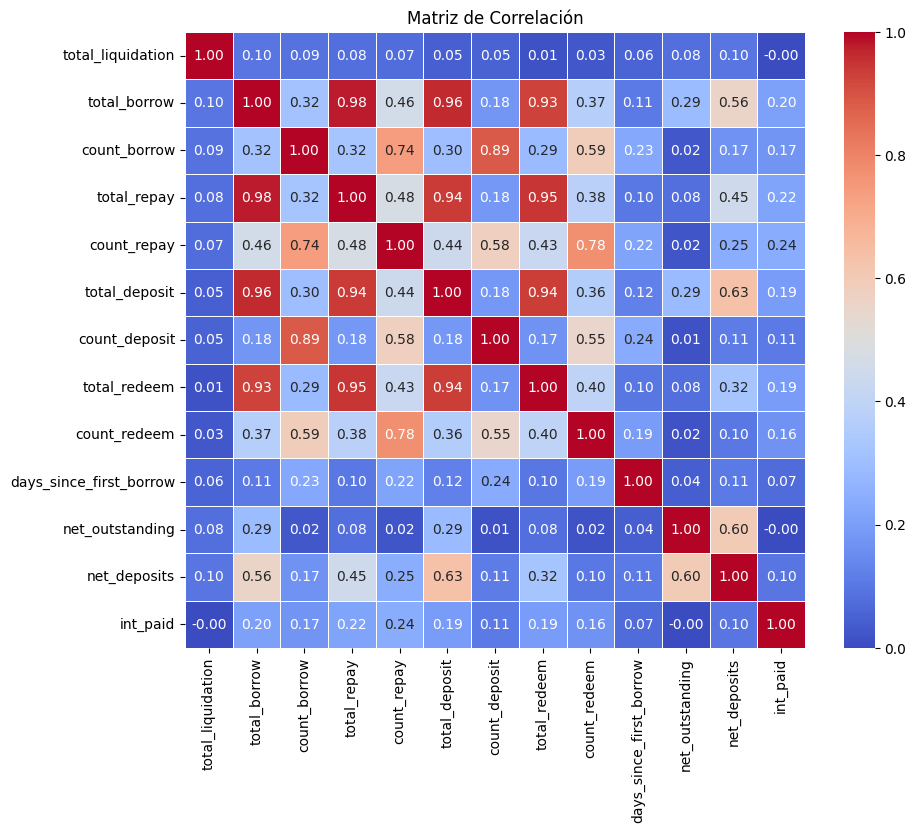

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # a Pearson co-relation matrix is ​​created between the important variables regarding the problem in question
columnas_seleccionadas = ['total_liquidation', "total_borrow", "count_borrow","total_repay","count_repay","total_deposit","count_deposit","total_redeem","count_redeem","days_since_first_borrow","net_outstanding","net_deposits","int_paid"]
datos_seleccionados = df_modelo2[columnas_seleccionadas]
matriz_correlacion = datos_seleccionados.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

What we do in this correlation matrix is ​​analyze which variables of the training set have a high correlation with respect to the complementary variable count_liquidation since this is a variable that is fundamental for the predictive model in addition to taking into account the context of defi and liquidations and that variable can affect.For this reason we choose the ones that have the most correlation taking into account the context las cuales son: count_borrow,net_outstanding,net_deposits.

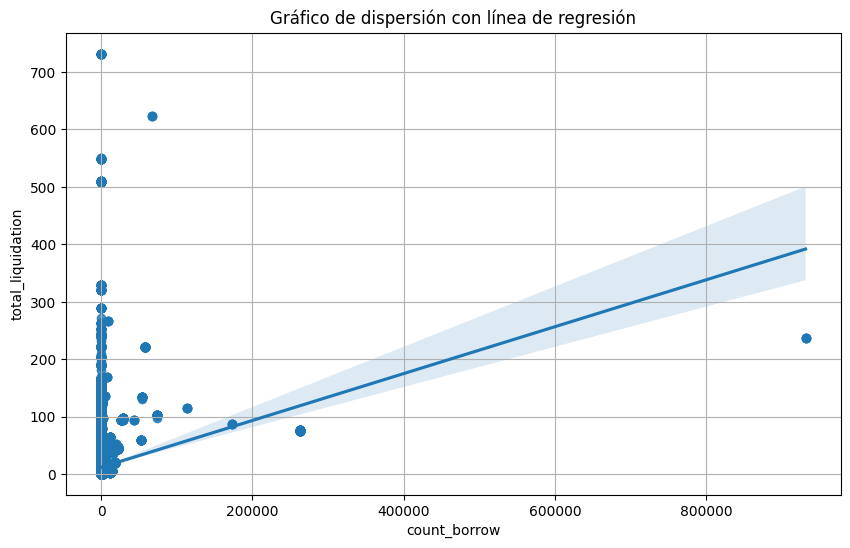

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='total_liquidation', y='count_borrow', data=df_modelo2)
plt.title('Gráfico de dispersión con línea de regresión')
plt.xlabel('count_borrow')
plt.ylabel('total_liquidation')
plt.grid(True)
plt.show()


We observe that there is no linear relationship with the main variable with respect to the other variable to determine the prediction with greater precision, this possibly due to the great variability that exists in the variables due to conditions of the crypto market such as volatility, liquidity with respect to cycles of marking, leverage among others

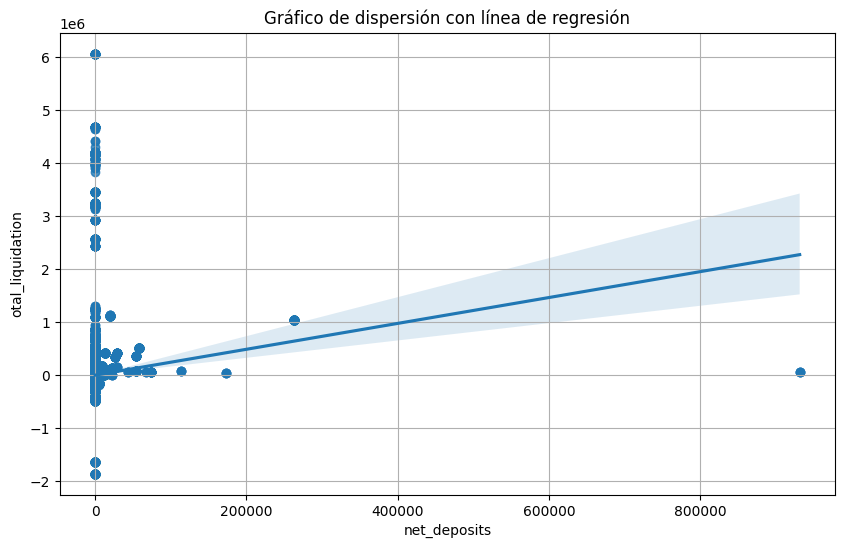

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='total_liquidation', y='net_deposits', data=df_modelo2)
plt.title('Gráfico de dispersión con línea de regresión')
plt.xlabel('net_deposits')
plt.ylabel('otal_liquidation')
plt.grid(True)
plt.show()

We observe that there is no linear relationship with the main variable with respect to the other variable to determine the prediction with greater precision, this possibly due to the great variability that exists in the variables due to conditions of the crypto market such as volatility, liquidity with respect to cycles of marking, leverage among others

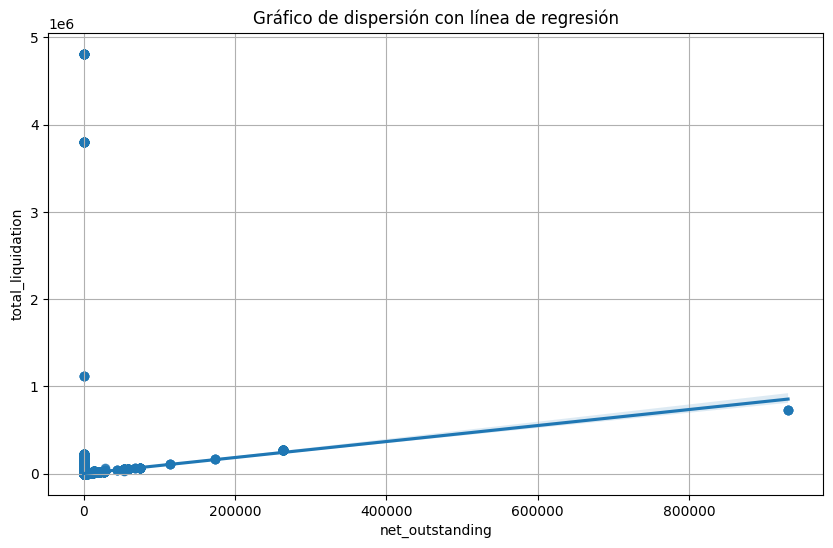

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='total_liquidation', y='net_outstanding', data=df_modelo2)
plt.title('Gráfico de dispersión con línea de regresión')
plt.xlabel('net_outstanding')
plt.ylabel('total_liquidation')
plt.grid(True)
plt.show()

We observe that there is a linear relationship, which is why we leave the variable for the model.

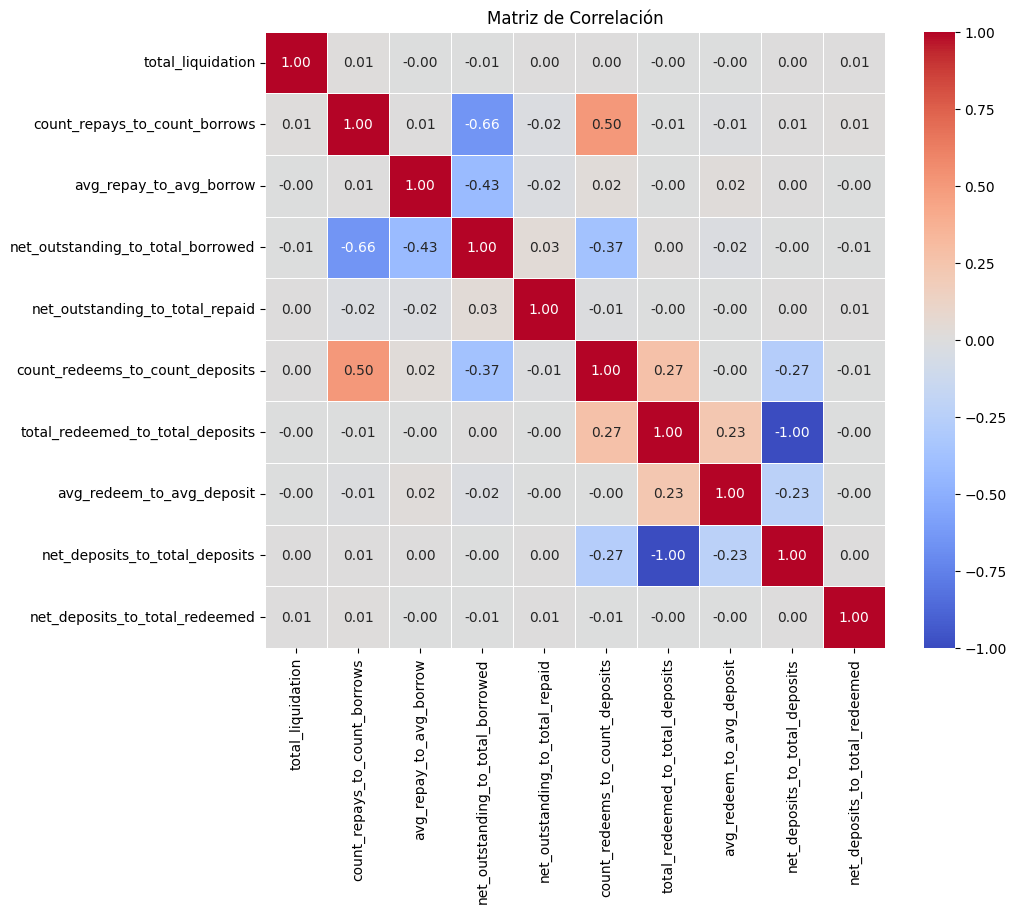

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # a Pearson co-relation matrix is ​​created between the important variables regarding the problem in question
columnas_seleccionadas = ['total_liquidation', "count_repays_to_count_borrows", "avg_repay_to_avg_borrow","net_outstanding_to_total_borrowed","net_outstanding_to_total_repaid","count_redeems_to_count_deposits","total_redeemed_to_total_deposits","avg_redeem_to_avg_deposit","net_deposits_to_total_deposits","net_deposits_to_total_redeemed"]
datos_seleccionados = df_modelo2[columnas_seleccionadas]
matriz_correlacion = datos_seleccionados.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Since there is no relevant correlation in the previous graph, we proceed to do so using Pearman correlation.

In [20]:
from scipy.stats import spearmanr

# code to calculate the spearmanr correlation
spearman_corr, p_value = spearmanr(df_modelo2['total_liquidation'], df_modelo2["count_borrow"])
print("Coeficiente de correlación de rango de Spearman:", spearman_corr)


Coeficiente de correlación de rango de Spearman: -0.053523056244898504


Due to the great variability in the defi sector and its variables due to various factors, Spearman correlation is applied to analyze a more robust correlation. In this case it is very low, which is why this variable is not taken into account.

In [21]:
from scipy.stats import spearmanr

# code to calculate the spearmanr correlation
spearman_corr, p_value = spearmanr(df_modelo2['total_liquidation'], df_modelo2["net_deposits"])
print("Coeficiente de correlación de rango de Spearman:", spearman_corr)

Coeficiente de correlación de rango de Spearman: 0.01362791140622071


Due to the great variability in the defi sector and its variables due to various factors, Spearman correlation is applied to analyze a more robust correlation. In this case it is very low, which is why this variable is not taken into account.

In [22]:
from scipy.stats import spearmanr

# code to calculate the spearmanr correlation
spearman_corr, p_value = spearmanr(df_modelo2['total_liquidation'], df_modelo2["count_repays_to_count_borrows"])
print("Coeficiente de correlación de rango de Spearman:", spearman_corr)

Coeficiente de correlación de rango de Spearman: -0.20751948634073858


Due to the great variability in the defi sector and its variables due to various factors, Spearman correlation is applied to analyze a more robust correlation. In this case, the correlation is stronger than those with respect to the other variables, which is why we include it in the model.

In [23]:
from scipy.stats import spearmanr

# code to calculate the spearmanr correlation
spearman_corr, p_value = spearmanr(df_modelo2['total_liquidation'], df_modelo2["avg_repay_to_avg_borrow"])
print("Coeficiente de correlación de rango de Spearman:", spearman_corr)

Coeficiente de correlación de rango de Spearman: -0.17657935775888192


Due to the great variability in the defi sector and its variables due to various factors, Spearman correlation is applied to analyze a more robust correlation. In this case it is very low, which is why this variable is not taken into account

In [24]:
from scipy.stats import spearmanr

# code to calculate the spearmanr correlation
spearman_corr, p_value = spearmanr(df_modelo2['total_liquidation'], df_modelo2["net_outstanding_to_total_borrowed"])
print("Coeficiente de correlación de rango de Spearman:", spearman_corr)

Coeficiente de correlación de rango de Spearman: 0.3184050027333459


Due to the great variability in the defi sector and its variables due to various factors, Spearman correlation is applied to analyze a more robust correlation. In this case, the correlation is stronger than those with respect to the other variables, which is why we include it in the model.

In [25]:
from scipy.stats import spearmanr

# code to calculate the spearmanr correlation
spearman_corr, p_value = spearmanr(df_modelo2['total_liquidation'], df_modelo2["net_outstanding_to_total_repaid"])
print("Coeficiente de correlación de rango de Spearman:", spearman_corr)

Coeficiente de correlación de rango de Spearman: 0.19392198062606586


Due to the great variability in the defi sector and its variables due to various factors, Spearman correlation is applied to analyze a more robust correlation. In this case, the correlation is stronger than those with respect to the other variables, which is why we include it in the model.

In [26]:
from scipy.stats import spearmanr

# code to calculate the spearmanr correlation
spearman_corr, p_value = spearmanr(df_modelo2['total_liquidation'], df_modelo2["count_redeems_to_count_deposits"])
print("Coeficiente de correlación de rango de Spearman:", spearman_corr)

Coeficiente de correlación de rango de Spearman: -0.11019801041279413


Due to the great variability in the defi sector and its variables due to various factors, Spearman correlation is applied to analyze a more robust correlation. In this case it is very low, which is why this variable is not taken into account

In [27]:
from scipy.stats import spearmanr

# code to calculate the spearmanr correlation
spearman_corr, p_value = spearmanr(df_modelo2['total_liquidation'], df_modelo2["avg_liquidation_to_avg_borrow"])
print("Coeficiente de correlación de rango de Spearman:", spearman_corr)

Coeficiente de correlación de rango de Spearman: 0.989478003646947


Due to the great variability in the defi sector and its variables due to various factors, Spearman correlation is applied to analyze a more robust correlation. In this case it is very low, which is why this variable is not taken into account

no hay valores nulos en las variables escoguidas 

In [2]:
import pandas as pd
import numpy as np

# We transformed the "gora-competition-evaluation" daset to pandas for better manipulation, analysis, visualization and ML prediction model
df_modelo = pd.DataFrame(df)
# save the pandas dataframe in a csv file
df_modelo .to_csv('data_set.csv', index=False, header=True)

In [3]:
# we read the pandas dataframe in csv format
df_modelo = pd.read_csv('data_set.csv')

In [4]:
df_modelo.to_parquet('data_set.parquet', index=False)

In [5]:
# we analyze the dataframe to analyze, extract metrics and in some cases find findings through visualizations,
# correlations etc. that allow us to determine which characteristics are decisive and important for the model
df_modelo.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19.039084,18,1.057727,2.268998,2022-05-07,USDC,2.145165,0.100039,1.0,0.100039,...,0.032258,0.701785,21.755339,0.298215,0.424938,0.0,0.0,0.0,2023-02-04 16:06:12.097,2023-02-04 16:09:32.485
1,0.140274,1,0.140274,0.000000,2022-08-02,usdc,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.182521,0.0,0.0,0.0,2023-03-01 16:06:24.346,2023-03-01 16:11:22.942
2,9.020736,1,9.020736,0.000000,2022-11-21,usdc,0.000000,0.000000,0.0,0.000000,...,1.000000,0.354577,0.354577,0.645423,1.820265,0.0,0.0,0.0,2023-02-03 16:06:11.043,2023-02-03 16:18:48.896
3,20.050150,1,20.050150,0.000000,2022-08-27,USDC,0.000000,20.007832,1.0,20.007832,...,0.000000,0.000000,0.000000,1.000000,78.856029,0.0,0.0,0.0,2023-02-05 16:06:16.899,2023-02-05 16:16:27.687
4,0.000100,1,0.000100,0.000000,2022-09-06,USDC,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,13.051750,0.0,0.0,0.0,2023-01-18 21:18:42.947,2023-01-19 07:01:39.016


In [6]:
 # we add the names of each column to a list for better analysis
nombres_columnas = ['total_borrow', 'count_borrow', 'avg_borrow_amount', 'std_borrow_amount', 'first_borrow_date', 'token_borrow_mode', 'borrow_amount_cv', 'total_repay', 'count_repay', 'avg_repay_amount', 'std_repay_amount', 'repay_amount_cv', 'total_deposit', 'count_deposit', 'avg_deposit_amount', 'std_deposit_amount', 'deposit_amount_cv', 'total_redeem', 'count_redeem', 'avg_redeem_amount', 'std_redeem_amount', 'redeem_amount_cv', 'days_since_first_borrow', 'net_outstanding', 'int_paid', 'net_deposits', 'count_repays_to_count_borrows', 'avg_repay_to_avg_borrow', 'net_outstanding_to_total_borrowed', 'net_outstanding_to_total_repaid', 'count_redeems_to_count_deposits', 'total_redeemed_to_total_deposits', 'avg_redeem_to_avg_deposit', 'net_deposits_to_total_deposits', 'net_deposits_to_total_redeemed', 'dex_total_sum_added', 'dex_total_sum_removed', 'dex_total_sum_swapped', 'calc_start_time', 'added_at']
# assign names to each column
df_modelo.columns = nombres_columnas

In [7]:
# save the changes to the csv file
df_modelo .to_parquet('data_set.parquet', index=False)

In [8]:
import pandas as pd
import numpy as np 

df_modelo = pd.read_parquet('data_set.parquet')


In [10]:
df_modelo.head(5)

,total_borrow,count_borrow,avg_borrow_amount,std_borrow_amount,first_borrow_date,token_borrow_mode,borrow_amount_cv,total_repay,count_repay,avg_repay_amount,...,count_redeems_to_count_deposits,total_redeemed_to_total_deposits,avg_redeem_to_avg_deposit,net_deposits_to_total_deposits,net_deposits_to_total_redeemed,dex_total_sum_added,dex_total_sum_removed,dex_total_sum_swapped,calc_start_time,added_at
0,19.039084,18,1.057727,2.268998,2022-05-07,USDC,2.145165,0.100039,1.0,0.100039,...,0.032258,0.701785,21.755339,0.298215,0.424938,0.0,0.0,0.0,2023-02-04 16:06:12.097,2023-02-04 16:09:32.485
1,0.140274,1,0.140274,0.000000,2022-08-02,usdc,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.182521,0.0,0.0,0.0,2023-03-01 16:06:24.346,2023-03-01 16:11:22.942
2,9.020736,1,9.020736,0.000000,2022-11-21,usdc,0.000000,0.000000,0.0,0.000000,...,1.000000,0.354577,0.354577,0.645423,1.820265,0.0,0.0,0.0,2023-02-03 16:06:11.043,2023-02-03 16:18:48.896
3,20.050150,1,20.050150,0.000000,2022-08-27,USDC,0.000000,20.007832,1.0,20.007832,...,0.000000,0.000000,0.000000,1.000000,78.856029,0.0,0.0,0.0,2023-02-05 16:06:16.899,2023-02-05 16:16:27.687
4,0.000100,1,0.000100,0.000000,2022-09-06,USDC,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,13.051750,0.0,0.0,0.0,2023-01-18 21:18:42.947,2023-01-19 07:01:39.016
